# U2.1 Discriminant functions

**2023_01_26_Question_2:** $\;$ Given the classifier in 2 classes defined
by their weight vectors $ \boldsymbol{w}_1 =(-2,3,3)^t,\; \boldsymbol{w}_2 =(0,2,-2)^t$ in homogeneous notation,
which of the following sets of vectors **does not** define a classifier equivalent to the one given?
1. $\boldsymbol{w}_1 =(1,3,3)^t,\; \boldsymbol{w}_2 =(3,2,-2)^t$
2. $\boldsymbol{w}_1 =(-4,6,6)^t,\; \boldsymbol{w}_2 =(0,4,-4)^t$
3. $\boldsymbol{w}_1 =(-1,6,6)^t,\; \boldsymbol{w}_2 =(3,4,-4)^t$
4. $\boldsymbol{w}_1 =(2,-3,-3)^t,\; \boldsymbol{w}_2 =(0,-2,2)^t$

**Solution:** $\;$ Option 4.

**2023_01_17_Question 3:** $\;$ Let the classifier in two classes be defined by its boundary and decision regions in the figure:

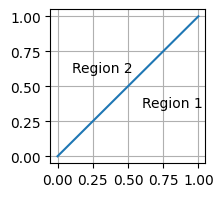

In [1]:
import numpy as np; import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2)); ticks = np.arange(0, 1.1, 0.25); plt.xticks(ticks); plt.yticks(ticks); plt.grid()
plt.plot((0, 1), (0, 1)); plt.text(0.1, 0.6, 'Region 2'); plt.text(0.6, 0.35, 'Region 1');

Which of the following weight vectors (in homogeneous notation) defines a classifier equivalent to that given?
1. $\boldsymbol{w}_1=(0,-2,0)^t\;$ and $\;\boldsymbol{w}_2=(0,0,-2)^t$.
2. $\boldsymbol{w}_1=(0,2,0)^t\;$ and $\;\boldsymbol{w}_2=(0,0,2)^t$.
3. $\boldsymbol{w}_1=(0,0,2)^t\;$ and $\;\boldsymbol{w}_2=(0,2,0)^t$.
4. All the above weight vectors define equivalent classifiers.

**Solution:** $\;$ Option 2.

**2022_02_03_Question:** $\;$ Let $\boldsymbol{x}$ be an object to be classified into a class of $C$ possibles. Indicate which of the following classifiers **is not** minimum error (or choose the last option if all three are minimum error):
1. $c(\boldsymbol{x})=\operatorname*{argmax}\limits_{c=1,\dotsc,C}\;\log p(c) + \log p(\boldsymbol{x}|c ) - \log p(\boldsymbol{x})$
2. $c(\boldsymbol{x})=\operatorname*{argmax}\limits_{ c=1,\dotsc,C}\;-\log p(\boldsymbol{x},c)$
3. $c(\boldsymbol{x})=\operatorname*{argmax}\limits_{c=1,\dotsc,C}\;\log p(c) + \log p(\boldsymbol{x}|c )$
4. The three classifiers above are of minimum error

**Solution:** $\;$ Option 2.

**Problem (cont. of problem T1.2):** $\;$ Consider the classification of Iris flowers as setosa or non-setosa based on petal length, $x$. It is known that the distributions of $x$ for setosa and non-setosa can be approximated by normal distributions of means and standard deviations:
$$p(x\mid c=\text{set})\sim\mathcal{N}(\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
\qquad\text{and}\qquad%
p(x\mid c=\text{nos})\sim\mathcal{N}(\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)$$
Likewise, it is known that the a priori probability of setosa is $1/3$ and that the a posteriori probability that a flower of petal length $2$ is setosa is $0.89$. Find the decision boundary between setosa and non-setosa, and determine the decision regions of the classes.

**Solution:**

*Decision boundary between setosa and non-setosa classes:*

$$\begin{gather*}
P(c=\text{set}\mid x)=P(c=\text{nos}\mid x)\\%
1/3\cdot\mathcal{N}(x\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
=2/3\cdot\mathcal{N}(x\mid\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)\\
\frac{1}{0.17}\exp\left(-\frac{(x-1.46)^2}{2\cdot 0.17^2}\,\right)%
=\frac{2}{0.82}\exp\left(-\frac{(x-4.91)^2}{2\cdot 0.82^2}\,\right)\\
-17.3\,(x-1.46)^2+0.74\,(x-4.91)^2+0.88=0\\
-17.3x^2+50.52x-36.88+0.74x^2-7.27x+17.84+0.88=0\\
-16.56x^2+43.25x-18.16=0\\
x=\frac{-43.25\pm\sqrt{1870.6-1202.9}}{-33.12}=\frac{-43.25\pm 25.84}{-33.12}%
=\begin{cases}0.53\\2.09\end{cases}
\end{gather*}$$

*Decision regions:*
* Normal densities are defined throughout $\mathbb{R}$, but we are only interested in $\mathbb{R}^+$
* The boundary found divides $\mathbb{R}^+$ into three intervals: $(0,0.53),\, (0.53, 2.09)\,$ and $\,(2.09,\infty)$
* Since $x=2$ is setosa, $\mathcal{R}_{\text{setosa}}=(0.53, 2.09)\,$ and $\,\mathcal{R}_{\text{not- setosa}}=(0,0.53)\cup(2.09,\infty)$

Since the normal distribution is positive throughout $\mathbb{R}$, the assumption of normality of the conditional densities implies that we assume any (positive) length of petals, both setosa and non-setosa, is possible. Obviously, it is practically impossible to find setosa or non-setosa petal length in $(0,0.53)$. Now, with the assumption made, it is highly improbable but not theoretically impossible. Thus, since the conditional of non-setosa is flatter than that of setosa, the calculations indicate that in $(0,0.53)$ the flower is more likely to be non-setosa.

We check the result with graphs of the posterior probabilities as a function of $x$:

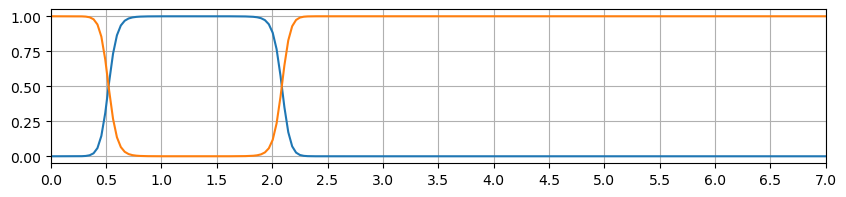

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import norm
p_set = lambda x: norm.pdf(x, 1.46, 0.17); p_nos = lambda x: norm.pdf(x, 4.91, 0.82)
P_set = lambda x: 1/3.0 * p_set(x) / (1/3.0 * p_set(x) + 2/3.0 * p_nos(x))
fig = plt.figure(figsize=(10, 2)); plt.xlim(0, 7); plt.xticks(np.arange(0, 7.1, .5)); plt.grid();
x = np.linspace(0, 7, 200); plt.plot(x, P_set(x), x, 1.0-P_set(x));